In [29]:
# hyperparameter sweep on CIFAR-10 dataset

date = 280623
save_location = r'/its/home/nn268/AntQueen/classifier/saves/280623/'


In [9]:
!pip install torch --user
!pip install numpy --user
!pip install sklearn --user
!pip install random --user
!pip install matplotlib.pyplot --user
!pip install wget --user
!pip install zipfile --user
!pip install opencv-python --user
!pip install tensorflow --user
!pip install keras --user

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [5]:
!pip install seaborn

     |████████████████████████████████| 293 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 154.5 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 112.2 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 110.2 MB/s eta 0:00:01


In [7]:
# imports

import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import wget


import os
from torch.nn import functional
from zipfile import ZipFile
import cv2

import tensorflow as tf
import keras.datasets
import pickle
import umap
import seaborn as sns

In [8]:
# get data

random_seed = 42   # random.seed()

(x_train,y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.1, train_size=0.9,
                                      random_state=random_seed, shuffle = True)

In [4]:
print('train: ', len(x_train),type(x_train), len(y_train), type(y_train))
print('val: ', len(x_val),type(x_val), len(y_val),type(y_val))
print('test: ', len(x_test),type(x_test), len(y_test),type(y_test))


print(x_train[0].shape)
print(x_val.shape)
print(x_test.shape)

train:  45000 <class 'numpy.ndarray'> 45000 <class 'numpy.ndarray'>
val:  5000 <class 'numpy.ndarray'> 5000 <class 'numpy.ndarray'>
test:  10000 <class 'numpy.ndarray'> 10000 <class 'numpy.ndarray'>
(32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)


In [12]:



data = x_train / 255.0
target = y_train

flattened = data.reshape(data.shape[0], -1)
embedding = umap.UMAP(n_neighbors=10).fit_transform(flattened)

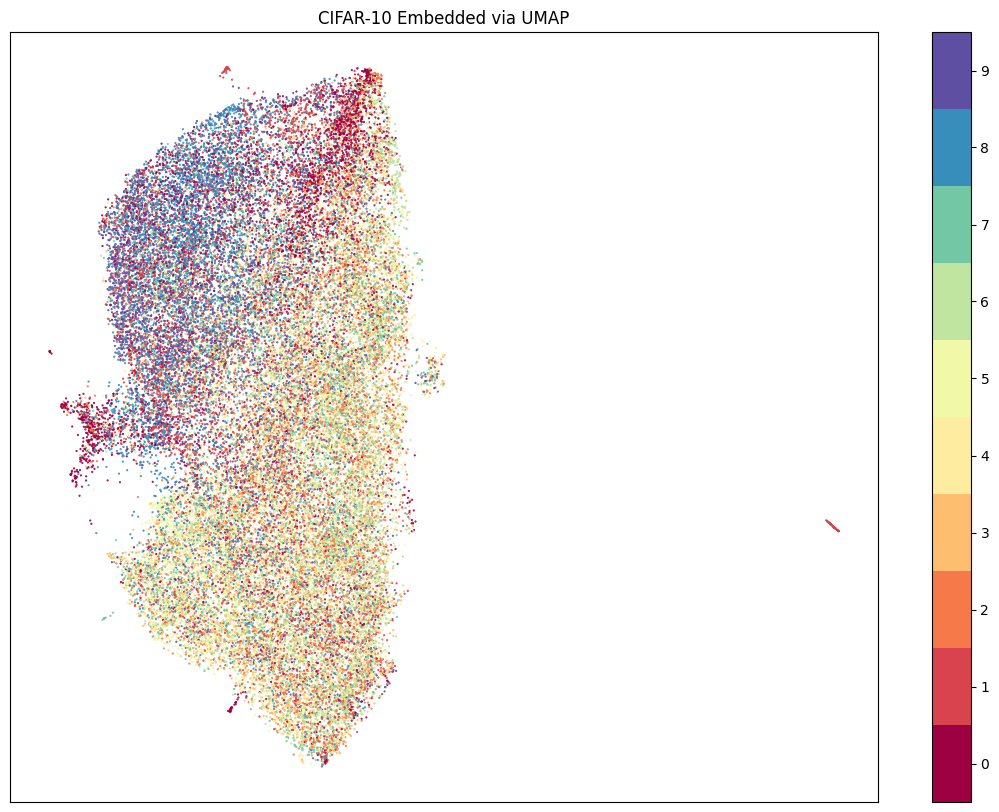

In [14]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
#cbar.set_ticklabels(classes)
plt.title('CIFAR-10 Embedded via UMAP');

In [5]:
print(y_train[1][0])

1


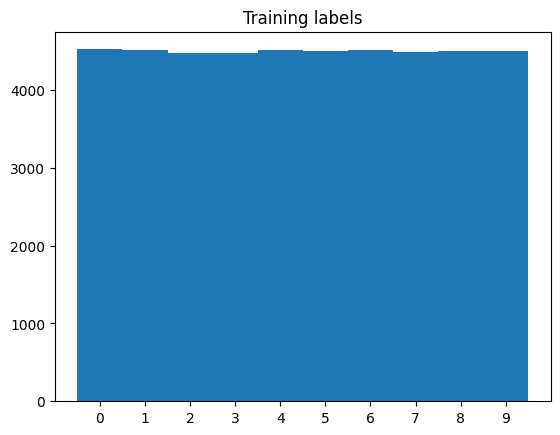

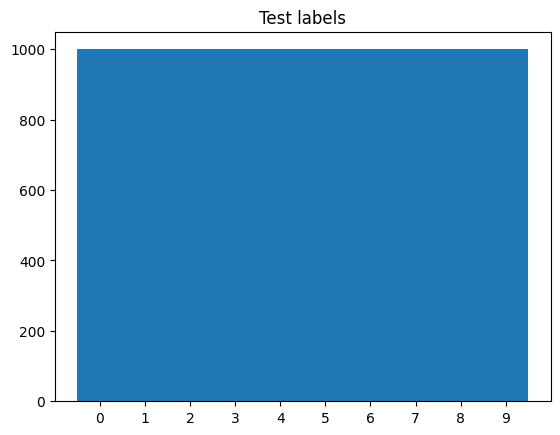

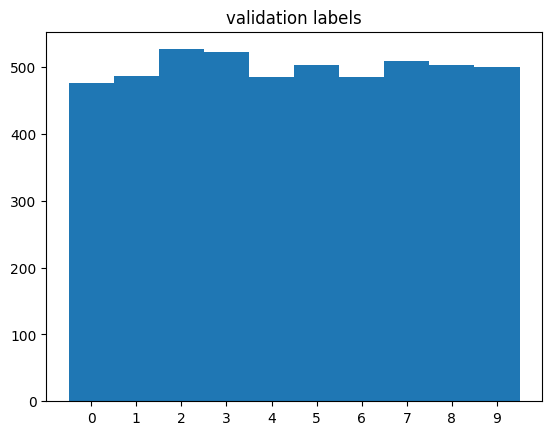

In [6]:
def label_dist_plot(data, label):
  plt.figure()
  
  data = [int(x[0]) for x in data]
  _, _, _ = plt.hist(data, bins=[0, 1, 2,3,4,5,6,7,8,9,10,11], align='left')
  plt.xticks(np.unique(data))
  plt.xlim(left=min(np.unique(data))-1, right=max(np.unique(data))+1)
  plt.title(label)
  plt.show()


label_dist_plot(y_train, 'Training labels')
label_dist_plot(y_test, 'Test labels')
label_dist_plot(y_val, 'validation labels')

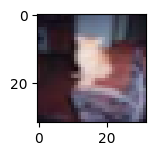

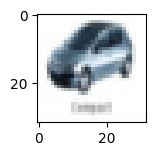

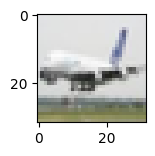

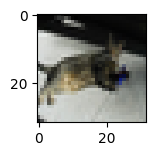

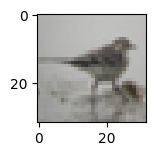

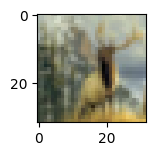

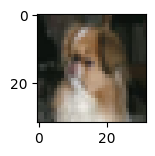

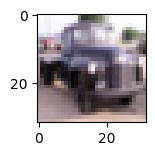

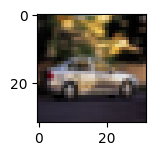

In [7]:
# look at imgs

for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.show()

With no tensoring: 


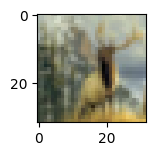

With old tensoring: 


NameError: name 'device' is not defined

In [8]:
############# THIS IS WHY IT WAS FAILING - The silly mistake has been found


def old_tensoring(input):
        input = input.astype('float32')
        #input = input/255
        img_tensor = torch.tensor(input)
        img_tensor = img_tensor.to(torch.float32)
        img_tensor = functional.normalize(img_tensor)
        img_tensor = torch.reshape(img_tensor, [1,3,32, 32])
        img_tensor = img_tensor.to(device)

        return img_tensor
    
def new_tensoring(input):
        input = input.astype('float32')
        #input = input/255
        print(input.shape)
        img_tensor = torch.tensor(input)
        img_tensor = img_tensor.to(torch.float32)
        img_tensor = functional.normalize(img_tensor)
        img_tensor = img_tensor.permute(2, 0, 1)    ######### <<--------- The change
        img_tensor = img_tensor.reshape(1, 3, 32, 32)
        #img_tensor = torch.reshape(img_tensor, [1,3,32, 32])
        print(img_tensor.shape)
        img_tensor = img_tensor.to(device)

        return img_tensor


    
print('With no tensoring: ')

img = x_train[5]
plt.subplot(330 + 1)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()
    
"""print('With old tensoring: ')
for i in range(3):
    tense = old_tensoring(x_train[5])
    img = np.array(tense.to('cpu').squeeze()[i])
    print(img.shape)
    plt.subplot(330 + 1)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    
    
print('With new tensoring: ')    
for i in range(3):
    tense = new_tensoring(x_train[5])
    img = np.array(tense.to('cpu').squeeze()[i])
    print(img.shape)
    plt.subplot(330 + 1)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    """
    

def show_tensor_obj(function):
    for i in range(3):
        tense = function(x_train[5])
        img = np.array(tense.to('cpu').squeeze()[i])
        print(img.shape)
        plt.subplot(330 + 1)
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        plt.show()

print('With old tensoring: ')
show_tensor_obj(old_tensoring)
print('With new tensoring: ')  
show_tensor_obj(new_tensoring)


In [9]:
print(np.unique(y_train))

print(label_tensor_float(np.unique(y_train)[5]))

[0 1 2 3 4 5 6 7 8 9]


NameError: name 'label_tensor_float' is not defined

In [19]:
def tensoring(input):
        input = input.astype('float32')
        #input = input/255
        img_tensor = torch.tensor(input)
        img_tensor = img_tensor.to(torch.float32)
        img_tensor = functional.normalize(img_tensor)
        img_tensor = img_tensor.permute(2, 0, 1)    ######### <<--------- The change
        img_tensor = img_tensor.reshape(1, 3, 32, 32)
        img_tensor = img_tensor.to(device)

        return img_tensor


In [20]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda:0 device


In [21]:
def label_tensor_float(lab):
    label = torch.tensor(lab)
    label = label.to(torch.float32)
    label = label.to(device)
    return label

def label_oh_tf(lab):
    num_classes = 10
    one_hot = np.zeros(num_classes)
    one_hot[lab] = 1
    label = torch.tensor(one_hot)
    label = label.to(torch.float32)
    label = label.to(device) #
    return label
    
    

In [13]:
"""

# Define model - copy of what worked on MNIST
class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()
        
        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
          )
        
        self.linear_1 = nn.Sequential(    #1x4096 and 512x100)
            nn.Linear(4096, 100), 
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Linear(100,10),
            nn.Softmax(), 
  
        )

    def forward(self, x):
      #forward method. opposition to backward pass
      #print(x.shape)
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      #print('conv x', x.shape)
      x = self.linear_1(x)
      #print('lin1 x', x)
      return x

"""


"\n\n# Define model - copy of what worked on MNIST\nclass vgg16TorchNet(nn.Module):\n    def __init__(self):\n        super(vgg16TorchNet, self).__init__()\n        self.flatten = nn.Flatten()\n        \n        self.conv_layers = nn.Sequential(  #\n              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              nn.Dropout(p=0.5),\n              nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              nn.MaxPool2d(2, 2),\n              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              nn.Conv2d(in_channels =64, out_channels=128, kernel_size=3),\n              nn.ReLU(),\n              nn.MaxPool2d(2,2),\n              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              nn.Conv2d(in_channels =256

In [6]:
# Define model - copy of what worked on MNIST
class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Dropout(p=0.5), # [256, 128, 3, 3], expected input[1, 64, 9, 9]
          )
        
        self.linear_1 = nn.Sequential(    #1x4096 and 512x100)
            nn.Linear(4096, 100), 
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(100,10),
            nn.Softmax(), 
  
        )

    def forward(self, x):
      #forward method. opposition to backward pass
      #print(x.shape)
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      #print('conv x', x.shape)
      x = self.linear_1(x)
      #print('lin1 x', x)
      return x
        


In [15]:
"""# Define model
class vgg16TorchNet(nn.Module):
    def __init__(self):
        super(vgg16TorchNet, self).__init__()
        self.flatten = nn.Flatten()

        self.conv_layers = nn.Sequential(  #
              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Dropout(p=0.5),
              nn.Conv2d(in_channels =32, out_channels=32, kernel_size=3),
              nn.ReLU(),
              #nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2, 2),
              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              #nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              #nn.ReLU(),
              nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              #nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              #nn.ReLU(),
              nn.Conv2d(in_channels =256, out_channels=256, kernel_size=3),
              nn.ReLU(),
              nn.MaxPool2d(2,2),
              nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=2), 
              nn.ReLU(), #inplace=True
              #nn.Conv2d(in_channels =512, out_channels=512, kernel_size=3),
              #nn.ReLU(),
              #nn.Conv2d(in_channels =512, out_channels=512, kernel_size=3),
              #nn.ReLU(),
              #nn.MaxPool2d(2,2),
              nn.Dropout(p=0.5),
          )
        
        self.linear_1 = nn.Sequential(    # 1x18432 and 4608x100)

            nn.Linear(18432, 100), 
            nn.ReLU(),
            nn.Linear(100,100),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(100,10),
            nn.Softmax(), 
  
        )

    def forward(self, x):
      #forward method. opposition to backward pass
      #print(x.shape)
      x= self.conv_layers(x)
      x = x.flatten()
      x = x.squeeze()
      print('conv x', x.shape)
      x = self.linear_1(x)
      #print('lin1 x', x)
      return x
        """

"# Define model\nclass vgg16TorchNet(nn.Module):\n    def __init__(self):\n        super(vgg16TorchNet, self).__init__()\n        self.flatten = nn.Flatten()\n\n        self.conv_layers = nn.Sequential(  #\n              nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              nn.Dropout(p=0.5),\n              nn.Conv2d(in_channels =32, out_channels=32, kernel_size=3),\n              nn.ReLU(),\n              #nn.MaxPool2d(2, 2),\n              nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              nn.Conv2d(in_channels =64, out_channels=64, kernel_size=3),\n              nn.ReLU(),\n              nn.MaxPool2d(2, 2),\n              nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=2), \n              nn.ReLU(), #inplace=True\n              #nn.Conv2d(in_channels =128, out_channels=128, kernel_size=3),\n              #nn.ReLU(),\n   

In [30]:
# train loop
def train_loop(model, x_train, y_train, epoch, optimizer, loss_fn):
  model = model
  x_train = x_train
  y_train = y_train

  model.train()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0
    
  total_samples = len(x_train)

  for idx, img in enumerate(x_train):
    
      tense = tensoring(img)
      #print(tense.shape)
        
      """
      img = np.array(tense.to('cpu').squeeze()[i])
      print(img.shape)
      plt.subplot(330 + 1)
      plt.imshow(img, cmap=plt.get_cmap('gray'))
      plt.show()
      """
   
      prediction = model.forward(tense)
      label = label_oh_tf(y_train[idx])
       
      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      #print('\n ---------------------------------------------------------------')
      #print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label.argmax():
          print(f'\n ########################### HIT ###########################  -- {idx} / {total_samples} \n')
          num_correct +=1
      else:
        #print('\n ########################### MISS ########################### \n')
        pass
    
      total_count+=1

      #print(prediction, '\n Prediction:  ', prediction.argmax()) 
      #print('Label: ',label.argmax())
      #print('Loss: ', loss.item())
      #print('---------------------------------------------------------------')
      #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      

  return current_loss, predict_list, num_correct, model, optimizer


    


In [8]:
# validation loop

def validation_loop(model, x_val, y_val, epoch, loss_fn):
  model = model
  x_val = x_val
  y_val = y_val

  model.eval()

  predict_list = []
  total_count = 0
  num_correct = 0
  current_loss = 0

  for idx, img in enumerate(x_val):
    
      tense_img = tensoring(img)  
      prediction = model.forward(tense_img)
      label = label_oh_tf(y_val[idx]) 
    
      loss = loss_fn(prediction, label)
      predict_list.append(prediction.argmax())

      #print('\n ---------------------------------------------------------------')
      #print('             Epoch: ', epoch, '  Sample: ', idx)

      if prediction.argmax() == label.argmax():
          #print('\n ########################### HIT ########################### \n')
          num_correct +=1
      else:
        #print('\n ########################### MISS ########################### \n')
        pass
      total_count+=1

      #print('ArgPrediction: ', prediction.argmax()) #, prediction,'ARRRGGGG',
      #print('Label: ',label.argmax())
      #print('Loss: ', loss.item())
      #print('---------------------------------------------------------------')
      #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

      current_loss += loss.item()

  return current_loss, predict_list, num_correct


    


In [10]:
t_loss_list = []
t_predict_list =[]
t_accuracy_list = []

v_loss_list = []
v_predict_list =[]
v_accuracy_list = []

total_epochs = 0

title = f'CIFAR_v13_MnistStyleVGG_HyperSweep'
save_dict = {'Run' : title,
            'Current_Epoch': 0}

In [45]:
# training

from IPython.display import clear_output

fresh_model = False #lr5e-05_Adam_MSELoss()

if model == None or fresh_model == True:

    model =vgg16TorchNet().to(device)
    #model = model.to(device)
#model =vgg16TorchNet().to(device)
epochs=10

learning_rate= 5e-05   #5e-5
loss_fn = torch.nn.MSELoss()   #torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)#, weight_decay=1e-5)
optim= 'Adam'

"""
print('\n')
print('LR: ', learning_rate)
print('optimiser: ', optimizer)
print('loss fn: ', loss_fn)
"""
for epoch in range(epochs):
  #print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
  print('EPOCH: ', epoch)
  print('----------------------')
  print(' \n                  TRAINING... \n')
  print('----------------------')
  train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
  t_loss_list.append(train_loss)
  t_predict_list.append(train_predict_loss)
  t_accuracy_list.append(train_num_correct / len(y_train))


  print('----------------------')
  print(' \n                  VALIDATION... \n')
  print('----------------------')
  val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
  v_loss_list.append(val_loss)
  v_predict_list.append(val_predict_loss)
  v_accuracy_list.append(val_num_correct/ len(y_val))


  total_epochs += 1 ### Total epochs is from a previous save


  save_dict['Current Epoch'] = total_epochs
  save_dict['model.state_dict'] = model.state_dict()
  save_dict['training_samples'] = len(x_train)
  save_dict['validation_samples'] = len(x_val)
  save_dict['t_loss_list'] = t_loss_list
  save_dict['t_predict_list'] = t_predict_list
  save_dict['t_accuracy_list'] = t_accuracy_list
  save_dict['v_loss_list'] = v_loss_list
  save_dict['v_predict_list'] = v_predict_list
  save_dict['v_accuracy_list'] = v_accuracy_list
  #save_dict['epochCount']+=1 Now using current_epoch above

  if epoch== epochs-1:  ### Mabs change this to something like epoch == epochs, so that it only saves the final?
      version = f'extra64lay_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}'

      with open(f'{save_location}_Cifar_mnistarch_epoch{epoch}_{date}_{version}.pkl', 'wb') as f:
        pickle.dump(save_dict, f) 



  clear_output()

    


In [11]:
# Hyperparameter sweep

##### remember to make the pickle folder before running!
##### adapt train loopppp

import pickle
from IPython.display import clear_output
full_label = y_train

def hyperparameter_sweep():
    # a function to loop through hyperparameters for finding the best ones for certain architecture
    
    epochs = 20
    
    lr_list = [1e-4] #1e-7, 1e-6, #1e-7,1e-6,1e-5,1e-4,1e-3,1e-2, 5e-4, 5e-3, 5e-2
    optimiser_list = ['Adam'] #, 'SGD'
    lossfn_list = [torch.nn.MSELoss()] #, torch.nn.NLLLoss(), , 
    
    best_optim = None
    best_lossfn = None
    best_lr = 0
    best_valaccuracy = 0
    best_epoch = 0
    
    for loss_fn in lossfn_list:
        for optim in optimiser_list:
            for learning_rate in lr_list:
            
            
                
                model = vgg16TorchNet().to(device) #model architecture

                if optim =='Adam':
                    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
                elif optim == 'SGD':
                    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

                t_loss_list = []
                t_predict_list =[]
                t_accuracy_list = []

                v_loss_list = []
                v_predict_list =[]
                v_accuracy_list = []

                total_epochs = 0
                title = f'cifar_HyperParameterSweep_{str(learning_rate)}_{str(optimizer)}_{str(loss_fn)}schholcompREF'
                save_dict = {'Run' : title,
                            'Current_Epoch': 0}
                
                print('\n')
                print('LR: ', learning_rate)
                print('optimiser: ', optim)
                print('loss fn: ', loss_fn)
                
                for epoch in range(epochs):
                  print('lr: ',learning_rate, 'optim: ',optim, 'loss fn: ',loss_fn)
                  print('EPOCH: ', epoch)
                  print('----------------------')
                  print(' \n                  TRAINING... \n')
                  print('----------------------')
                  train_loss, train_predict_loss, train_num_correct, model, optimizer = train_loop(model, x_train, y_train, epoch, optimizer, loss_fn)
                  t_loss_list.append(train_loss)
                  t_predict_list.append(train_predict_loss)
                  t_accuracy_list.append(train_num_correct / len(y_train))


                  print('----------------------')
                  print(' \n                  VALIDATION... \n')
                  print('----------------------')
                  val_loss, val_predict_loss, val_num_correct = validation_loop(model, x_val, y_val, epoch, loss_fn)
                  v_loss_list.append(val_loss)
                  v_predict_list.append(val_predict_loss)
                  v_accuracy_list.append(val_num_correct/ len(y_val))

                  if v_accuracy_list[-1] > best_valaccuracy:
                        best_valaccuracy = v_accuracy_list[-1]
                        best_optim = optimizer
                        best_lossfn = loss_fn
                        best_lr = learning_rate
                        best_epoch = epoch

                  total_epochs += 1 ### Total epochs is from a previous save


                  save_dict['Current Epoch'] = total_epochs
                  save_dict['model.state_dict'] = model.state_dict()
                  save_dict['training_samples'] = len(x_train)
                  save_dict['validation_samples'] = len(x_val)
                  save_dict['t_loss_list'] = t_loss_list
                  save_dict['t_predict_list'] = t_predict_list
                  save_dict['t_accuracy_list'] = t_accuracy_list
                  save_dict['v_loss_list'] = v_loss_list
                  save_dict['v_predict_list'] = v_predict_list
                  save_dict['v_accuracy_list'] = v_accuracy_list
                  #save_dict['epochCount']+=1 Now using current_epoch above
                    
                  final_train_acc = round(t_accuracy_list[-1],3)
                  final_val_acc = round(v_accuracy_list[-1],3)
                  version =f'cifar-10_v12_epoch{total_epochs}_lr{str(learning_rate)}_{optim}_{str(loss_fn)}_Acc_{final_train_acc}_{final_val_acc}_schholcompREF'
                  
                  if epoch==epochs-1:
                      with open(save_location+f'Cifar_HyperparameterSweep_{date}_{version}.pkl', 'wb') as f:
                        pickle.dump(save_dict, f)
    
    
  
                  clear_output()
                     

    print('Top results from hyperparameter sweep:')
    print()
    print(best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch)
    return best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch, v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list



best_optim, best_lossfn, best_lr, best_valaccuracy, best_epoch,v_loss_list, t_loss_list, v_accuracy_list, t_accuracy_list = hyperparameter_sweep()


Top results from hyperparameter sweep:

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
) MSELoss() 0.0001 0.7912 19


In [17]:
print(t_loss_list)

## Graphs

In [47]:
print(total_epochs)
print(t_accuracy_list[-1]*100)
print(v_accuracy_list[-1]*100)
#.839_0.78_
print('Previous run \n train accuracy: 83.9% \n val accuracy: 78%')

40
91.46666666666667
80.84
Previous run 
 train accuracy: 83.9% 
 val accuracy: 78%


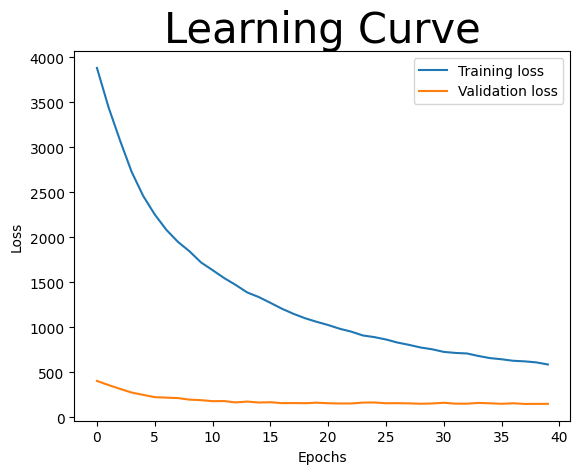

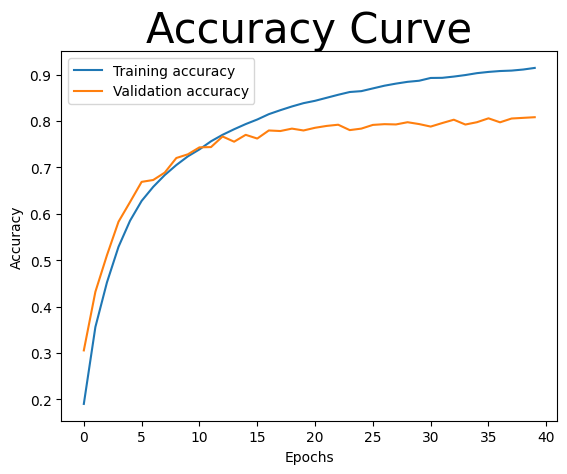

In [46]:
# learning curve
# Import date class from datetime module
import datetime

execution = datetime.datetime.now()


def learning_curve(v_loss_list, t_loss_list):
  plt.title(label="Learning Curve", fontsize =30)
  plt.plot(range(len(t_loss_list)), t_loss_list, label ='Training loss')
  plt.plot(range(len(v_loss_list)), v_loss_list, label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  #plt.yscale("log")
  plt.legend()
  plt.savefig(save_location+ 'Graphs/' +'LearningCuve'+run_name[0:20]+str(execution)+'.png', format='png') #run_name #+str(execution)
  plt.show()
  # save figs

 
def accuracy_curve(v_accuracy_list, t_accuracy_list):
  plt.title(label="Accuracy Curve", fontsize =30)
  plt.plot(range(len(t_accuracy_list)), t_accuracy_list, label ='Training accuracy')
  plt.plot(range(len(v_accuracy_list)), v_accuracy_list, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.savefig(save_location+ 'Graphs/' +'accuracyCuve'+run_name[0:20]+str(execution)+'.png', format='png')
  plt.show()
 
#save_location+ 'Graphs/' +'accuracyCuve'+run_name[0:20]+str(execution)+'.png', format='png'
learning_curve(v_loss_list, t_loss_list)

accuracy_curve(v_accuracy_list, t_accuracy_list)



In [48]:
## Test loop
model = model.to(device)
model.eval()

loss_fn = torch.nn.MSELoss()

test_predict_list = []
total_count = 0
num_correct = 0
current_loss = 0

for idx, img in enumerate(x_test):
  tense_img = tensoring(img)  
  prediction = model.forward(tense_img)
  label = label_oh_tf(y_test[idx]) 

  loss = loss_fn(prediction, label)
  predict_list.append(prediction.argmax())

  #print('\n ---------------------------------------------------------------')
  #print('             Epoch: ', epoch, '  Sample: ', idx)

  if prediction.argmax() == label.argmax():
      print('\n ########################### HIT ########################### \n')
      num_correct +=1
  else:
    print('\n ########################### MISS ########################### \n')

  total_count+=1

  print('ArgPrediction: ', prediction.argmax()) #, prediction,'ARRRGGGG',
  print('Label: ',label.argmax())
  #print('Loss: ', loss.item())
  #print('---------------------------------------------------------------')
  #print(" |||| ||||| ||||| ||||| ||||| ||||| |||| |||| ||||| |||| |||| ")

  current_loss += loss.item()


print('/////////////////////////////////////////////////')

print('Testing Results')

print('/////////////////////////////////////////////////')

print('Correct Answers: ', num_correct)
print('Total Questions: ', total_count)
print('% Accuracy: ', 100 * (num_correct / total_count))


 ########################### HIT ########################### 

ArgPrediction:  tensor(3, device='cuda:0')
Label:  tensor(3, device='cuda:0')

 ########################### HIT ########################### 

ArgPrediction:  tensor(8, device='cuda:0')
Label:  tensor(8, device='cuda:0')

 ########################### HIT ########################### 

ArgPrediction:  tensor(8, device='cuda:0')
Label:  tensor(8, device='cuda:0')

 ########################### HIT ########################### 

ArgPrediction:  tensor(0, device='cuda:0')
Label:  tensor(0, device='cuda:0')

 ########################### HIT ########################### 

ArgPrediction:  tensor(6, device='cuda:0')
Label:  tensor(6, device='cuda:0')

 ########################### HIT ########################### 

ArgPrediction:  tensor(6, device='cuda:0')
Label:  tensor(6, device='cuda:0')

 ########################### MISS ########################### 

ArgPrediction:  tensor(9, device='cuda:0')
Label:  tensor(1, device='cuda:0')

 ###

In [37]:
# confusion matrix
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

epoch_in_question =-1

Y_train =label_tensor_float(y_train)
Y_train=Y_train.cpu()

print('\n Training Confusion matrix')
train_epoch_matrix = confusion_matrix(Y_train, t_predict_list[epoch_in_question])
disp= ConfusionMatrixDisplay(train_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

print('\n Validation Confusion matrix')
val_epoch_matrix = confusion_matrix(y_val, v_predict_list[epoch_in_question])
disp= ConfusionMatrixDisplay(val_epoch_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()



 Training Confusion matrix


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

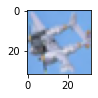

NameError: name 'model' is not defined

In [34]:
# seeing if validation works
i = 144
test_im = x_val[i]
test_y = y_val[i]
  
plt.subplot(330 + 1 + 2)
plt.imshow(test_im, cmap=plt.get_cmap('gray'))
plt.show()



tense_im = tensoring(test_im)
prediction_test = model.forward(tense_im)


num_classes = 10
one_hot = np.zeros(num_classes)
one_hot[test_y] = 1


label = torch.tensor(one_hot)
label = label.to(torch.float32)

print(' \n Prediction:  ',prediction_test.argmax())
print('\n LabeL: ',label.argmax())

In [12]:
# load saved pickle model for graphs or further training

import pickle



save_location = r'/its/home/nn268/AntQueen/classifier/saves/260623_hyperparam_sweep/'
#file_name = 'Cifar_epoch50_210623_CIFAR_v9_dropWD_tv_1e-07_Adam_MSELoss()schholcompREF.pkl' #Cifar_160623_CIFAR_v3_tv_1e-05_Adam_MSELoss()schholcompREF.pkl
file_name = 'Cifar_HyperparameterSweep_270623_cifar-10_v12_epoch20_lr5e-05_Adam_MSELoss()_Acc_0.839_0.78_schholcompREF.pkl'
model = vgg16TorchNet()


load_epoch= -1
#MNIST_Simple_3_layer_Antnet_Epoch_250523_24_0.05_ReLU_2linear.pkl

with open(save_location+f''+file_name, 'rb') as f:
    save_dict = pickle.load(f)

# Access dictionary elements
run_name = save_dict['Run'] 
total_epochs = save_dict['Current Epoch']
model_state_dict = save_dict['model.state_dict']
training_samples = save_dict['training_samples'] 
validation_samples = save_dict['validation_samples']

t_loss_list = save_dict['t_loss_list'] 
t_predict_list = save_dict['t_predict_list']
t_accuracy_list = save_dict['t_accuracy_list']

v_loss_list = save_dict['v_loss_list']
v_predict_list = save_dict['v_predict_list']  
v_accuracy_list = save_dict['v_accuracy_list']

# Load model state 
model.load_state_dict(model_state_dict) 

<All keys matched successfully>